# Random Number Generators (RNGs)

* LCG - CHOICES OF VALUES

* Gaussian Normal Dataset Generator || Box-Muller Transformations


### Standard Library Modules:

* `numpy.random.uniform`
* `random`

In [2]:
# Basic imports
import numpy as np, scipy as sc, matplotlib.pyplot as plt
import itertools # For slicing generator output

## Linear Congruential Generators (LCGs)

### Recurrence Relation:

$$\boxed{X_{n+1} = (aX_n + c)\!\!\!\!\mod\!m}$$

$X_i$ represents an element in the sequence.

### Inputs

* $m$: _Modulus_
* $a$: _Multiplier_
* $c$: _Increment_
* $X_0$: _Seed_ or Start Value

### Notes

* Uses a Discontinuous Piecewise Linear Equation
* Generates a sequence of _Pseudo-Random Numbers_
* If $c = 0$, the generator is also called a _Multiplicative Congurential Generator (MCG)_ or _Lehmer RNG_. if $c \ne 0$, the method is called a _Mixed Congruential Generator_.
* The Period of the LCG is highly sensitive to the choice of $a$ and $m$.
* Choosing $m$ to be a power of $2$ makes the LCG efficienct, as then, $\mod$ can be computed by simply truncating the binary expression.

* The _Spectral Test_ is a statistical test for the quality of LCGs. (Probably, the most powerful test for LCGs)

* From [Wikipedia](https://en.wikipedia.org/wiki/Spectral_test): LCGs have a property that when plotted in 2 or more dimensions, lines or hyperplanes will form, on which all possible outputs can be found. The spectral test compares the distance between these planes; the further apart they are, the worse the generator is.

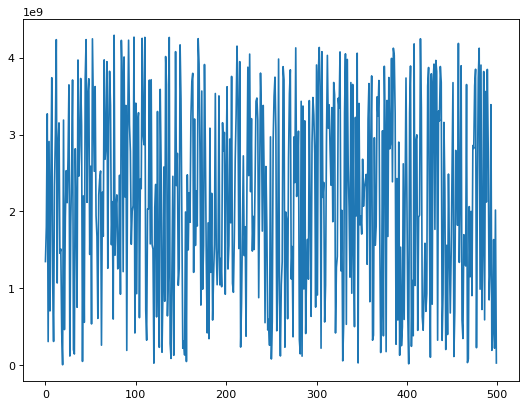

In [34]:
def LCG(a, c, m, seed):
    """
    Linear Congruential Generator
    INPUT:
    m: Modulus
    a: Multiplier
    c: Increment
    seed: Seed or Start Value
    OUTPUT:
    Sequence of Pseudo-Random Numbers, having a period, that is sensitive to the choice of a and m.
    """
    while True: # Infinite sequence generator (randomness, "bounded" by supplied parameters)
        seed = (a*seed + c) % m
        yield seed

# Trying out the Generator (Parameters, recommended by Numerical Recipes)
a = 1664525
c = 1013904223
m = 2**32 

rnList = list(itertools.islice(LCG(a, c, m, seed=200), 0, 500))

# Graph Customizations
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(rnList,)
plt.show()

## Normal DataSet Generation (Basic Box-Muller Transformation)

$$\boxed{Z_0 = \sqrt{-2\ln U_0}\cos(2\pi U_1)}$$

$$\boxed{Z_1 = \sqrt{-2\ln U_0}\sin(2\pi U_1)}$$

Here, $U_0$ and $U_1$ are independent samples, chosen from Uniform Distribution on the Unit Interval $(0, 1)$. $Z_0$ and $Z_1$ are independent random variables with a Standard Normal Distribution.

### Notes:

* Takes two samples from the uniform distribution, on the interval $[0, 1]$, and maps them to two standard, normally distributed samples.

* More computationally efficient on modern processors, than most other methods.

* Can be used to draw samples from Bivariate Gaussian Densities.

* Read more here: https://en.m.wikipedia.org/wiki/Box–Muller_transform

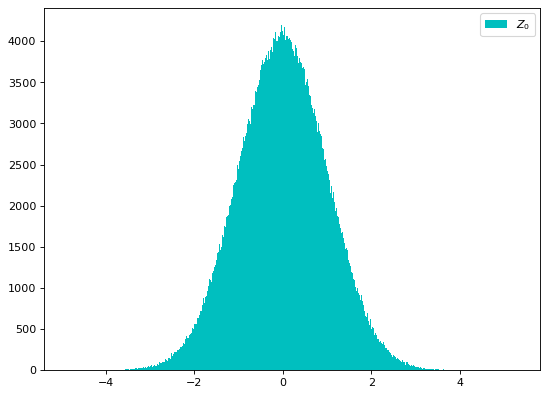

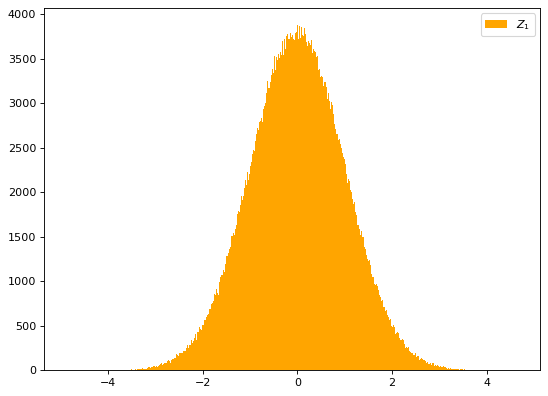

In [57]:
# Gaussian RNDataset Generator
def GRD(U0, U1):
    Z0 = np.sqrt(-2*np.log(U0))*np.cos(2*np.pi*U1)
    Z1 = np.sqrt(-2*np.log(U0))*np.sin(2*np.pi*U1)
    
    return Z0, Z1

# Using Library Function
U0 = np.random.uniform(0, 1, 1000000)
U1 = np.random.uniform(0, 1, 1000000)

Z0, Z1 = GRD(U0, U1)

# Graph Customizations
fig0 = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(Z0, bins=1000, color='c', label="$Z_0$")
plt.legend()

fig1 = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(Z1, bins=1000, color='orange', label="$Z_1$")
plt.legend()
plt.show()